**Analýza - match_players**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
match_players = pd.read_csv('/content/drive/MyDrive/Diplomová práca - Extrakcia a vyhodnocovanie herných dát/Datasety/match_players.csv')

In [ ]:
match_players.head()

,Unnamed: 0,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,match_link,player_id,player_nick,players_link,rating,team_name
0,0,163.2,3,10,1,10,90.0%,32,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,5736,kNgV-,/stats/players/5736/kngv,2.44,g3x
1,1,81.0,3,6,1,5,75.0%,17,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,2532,mch,/stats/players/2532/mch,1.55,g3x
2,2,77.6,3,10,1,11,75.0%,16,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,7382,steel,/stats/players/7382/steel,1.41,g3x
3,3,77.0,2,10,-1,6,85.0%,14,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,5698,pava,/stats/players/5698/pava,1.38,g3x
4,4,61.2,4,12,4,4,85.0%,10,32227,/stats/matches/mapstatsid/32227/intz-vs-g3x,10563,caike,/stats/players/10563/caike,1.16,g3x


In [ ]:
print(match_players.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945865 entries, 0 to 945864
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    945865 non-null  int64  
 1   adr           945865 non-null  object 
 2   assists       945865 non-null  int64  
 3   deaths        945865 non-null  int64  
 4   fkdiff        945865 non-null  int64  
 5   hs            945865 non-null  int64  
 6   kdratio       945865 non-null  object 
 7   kills         945865 non-null  int64  
 8   match_id      945865 non-null  int64  
 9   match_link    945865 non-null  object 
 10  player_id     945865 non-null  int64  
 11  player_nick   945864 non-null  object 
 12  players_link  945865 non-null  object 
 13  rating        945865 non-null  float64
 14  team_name     945865 non-null  object 
dtypes: float64(1), int64(8), object(6)
memory usage: 108.2+ MB
None


In [ ]:
match_players = match_players.drop(columns=['Unnamed: 0',  'match_link',  'players_link'])

In [ ]:
match_players.head()

,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,player_id,player_nick,rating,team_name
0,163.2,3,10,1,10,90.0%,32,32227,5736,kNgV-,2.44,g3x
1,81.0,3,6,1,5,75.0%,17,32227,2532,mch,1.55,g3x
2,77.6,3,10,1,11,75.0%,16,32227,7382,steel,1.41,g3x
3,77.0,2,10,-1,6,85.0%,14,32227,5698,pava,1.38,g3x
4,61.2,4,12,4,4,85.0%,10,32227,10563,caike,1.16,g3x


In [ ]:
# Konverzia adr a kdratio na float
match_players['adr'] = pd.to_numeric(match_players['adr'], errors='coerce')
match_players['kdratio'] = pd.to_numeric(
    match_players['kdratio'], errors='coerce'
)

# Konverzia hs na float a vypocet hs%
match_players['hs'] = pd.to_numeric(match_players['hs'], errors='coerce')
match_players['hs%'] = (
    match_players['hs'] / match_players['kills'] * 100
)

# Vloženie chýbajúcich hodnôt v adr
match_players['adr'] = match_players['adr'].fillna(match_players['adr'].median())

In [ ]:
# Alternatívny výpočet kdratio
match_players['kdratio'] = match_players.apply(
    lambda row: row['kills'] / row['deaths']
    if row['deaths'] != 0
    else float('inf')
    if row['kills'] != 0
    else 0
    if pd.isna(row['kdratio'])
    else row['kdratio'],
    axis=1,
)

In [ ]:
# Nahradenie NaN v hs% nulou, ak kills je 0
match_players['hs%'] = match_players.apply(
    lambda row: 0 if pd.isna(row['hs%']) and row['kills'] == 0 else row['hs%'],
    axis=1,
)

In [ ]:
player_stats = match_players.groupby('player_nick').agg(
    {
        'adr': 'mean',
        'assists': 'mean',
        'kills': 'mean',
        'deaths': 'mean',
        'hs%': 'mean',
        'kdratio': 'mean',
        'rating': 'mean',
    }
)

In [ ]:
match_players.head()

,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,player_id,player_nick,rating,team_name,hs%
0,163.2,3,10,1,10,3.200000,32,32227,5736,kNgV-,2.44,g3x,31.250000
1,81.0,3,6,1,5,2.833333,17,32227,2532,mch,1.55,g3x,29.411765
2,77.6,3,10,1,11,1.600000,16,32227,7382,steel,1.41,g3x,68.750000
3,77.0,2,10,-1,6,1.400000,14,32227,5698,pava,1.38,g3x,42.857143
4,61.2,4,12,4,4,0.833333,10,32227,10563,caike,1.16,g3x,40.000000


In [ ]:
player_stats.head()

,adr,assists,kills,deaths,hs%,kdratio,rating
player_nick,,,,,,,
!99,73.500000,2.0,6.5,18.000000,38.095238,0.362500,0.390000
$Bills$,69.450000,2.5,19.0,20.000000,55.263158,0.950000,0.945000
$ally,73.500000,4.0,21.0,18.750000,43.101190,1.114586,1.105000
$h0cK3r,67.500000,0.5,10.0,17.000000,52.197802,0.588235,0.665000
-Backstab,54.533333,2.0,9.0,18.333333,59.444444,0.490196,0.583333


Distribúcia ADR hráčov

In [ ]:
matches_played = match_players.groupby('player_nick')['match_id'].nunique()
matches_played = matches_played.reset_index()
matches_played.columns = ['player_nick', 'matches_played']

# Teraz zlučime matches_played s player_stats
player_stats = pd.merge(player_stats, matches_played, on='player_nick')

min_matches = 20
filtered_players = player_stats[player_stats['matches_played'] >= min_matches]

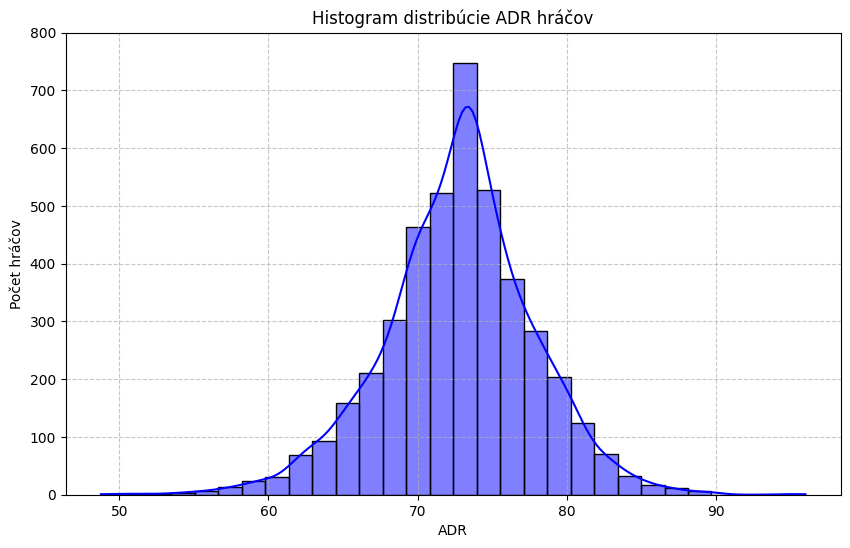

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_players['adr'], bins=30, kde=True, color='blue')
plt.title('Histogram distribúcie ADR hráčov')
plt.xlabel('ADR')
plt.ylabel('Počet hráčov')
plt.grid(True, linestyle='--', alpha=0.7)

max_y = plt.gca().get_ylim()[1]
yticks = np.arange(0, max_y + 100, 100)
plt.yticks(yticks)

plt.show()

Výpis hráčov s najvyšším priemerným ratingom

In [ ]:
top_rating = filtered_players.sort_values(by='rating', ascending=False).head(10)
print('Hráči s najvyšším ratingom (min. 20 zápasov):')
print(top_rating[['player_nick', 'rating']])

top_adr = filtered_players.sort_values(by='adr', ascending=False).head(10)
print('\nHráči s najvyšším adr (min. 20 zápasov):')
print(top_adr[['player_nick', 'adr']])

Hráči s najvyšším ratingom (min. 20 zápasov):
      player_nick    rating
13822       x1ron  1.454643
7302        ZywOo  1.365018
9307     forsaken  1.337037
2657        HuNtR  1.326087
8542         deko  1.319412
6247       Spywar  1.314762
12759    skoolage  1.304516
12593       sh1ro  1.285710
12461      saffee  1.282484
12399      s1mple  1.273805

Hráči s najvyšším adr (min. 20 zápasov):
      player_nick        adr
13822       x1ron  96.007143
12759    skoolage  94.525806
4612        Nertz  89.698901
7302        ZywOo  89.650672
6247       Spywar  89.438095
10422      keznit  89.417857
5092       Pororo  89.177273
2657        HuNtR  89.126087
7054     XANTARES  88.178830
4496      NEOFRAG  88.038095


Závislosti medzi jednotlivými štatistikami hráčov

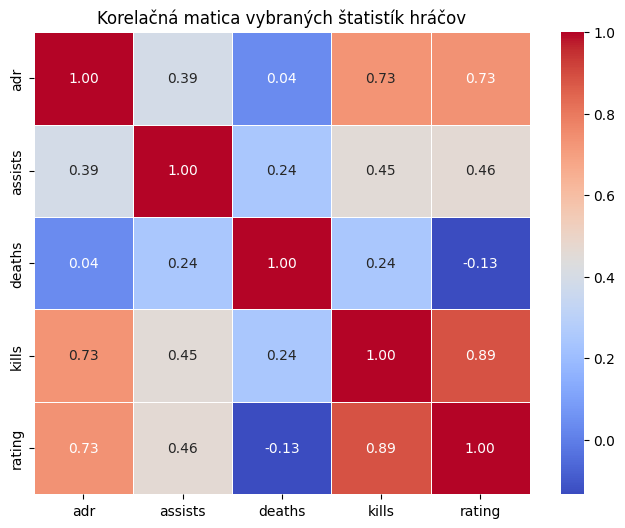

In [ ]:
selected_stats = player_stats[['adr', 'assists', 'deaths', 'kills', 'rating']]
correlation_matrix = selected_stats.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelačná matica vybraných štatistík hráčov')
plt.show()

Porovnanie výkonnosti hráčov v rámci tímu NIP

In [ ]:
nip_players = match_players[match_players['team_name'] == 'NIP']

# Výpočet počtu odohraných zápasov pre každého hráča NIP
matches_playedNIP = nip_players.groupby('player_nick')['match_id'].nunique()
matches_playedNIP = matches_playedNIP.reset_index()
matches_playedNIP.columns = ['player_nick', 'matches_played']

nip_player_stats = nip_players.groupby('player_nick').agg({
    'adr': 'mean',
    'kills': 'mean',
    'deaths': 'mean',
    'rating': 'mean'
})

Výpis tímov, v ktorých pôsobil hráč F0rest

In [ ]:
# Zlúčenie s počtom odohraných zápasov
nip_player_stats = pd.merge(nip_player_stats, matches_playedNIP, on='player_nick')

# Filtrovanie hráčov, ktorí odohrali aspoň 20 zápasov
filtered_nip_players = nip_player_stats[nip_player_stats['matches_played'] >= 20]

# Identifikácia najlepších a najslabších hráčov
top_nip_players = filtered_nip_players.sort_values(by='rating', ascending=False)

print('Najlepší hráči NIP :')
print(top_nip_players)

Najlepší hráči NIP :
   player_nick        adr      kills     deaths    rating  matches_played
17      f0rest  74.876956  19.608133  16.536661  1.159526            1623
3    GeT_RiGhT  75.046611  19.010870  16.396419  1.145639            1564
16      draken  72.271672  18.542662  16.703072  1.108020             293
8      Plopski  76.833131  18.164134  17.668693  1.095775             329
9          REZ  77.661772  18.113757  17.892857  1.092130             756
6    Maikelele  73.798901  17.230769  16.175824  1.084615              91
23       nawwk  68.825352  18.220657  16.572770  1.072911             213
11        Xizt  73.715235  17.643436  16.449757  1.072715            1234
13      dennis  75.759073  18.293436  18.150579  1.062046             259
5        Lekr0  73.371237  17.244624  17.569892  1.049140             372
20     friberg  73.453242  17.379909  16.855708  1.047918            1095
12        allu  73.500000  18.101215  16.643725  1.046235             247
21      hampus  7

In [ ]:
# Vyfiltrovanie riadkov pre f0rest
f0rest_teams = match_players[match_players['player_nick'] == 'f0rest']

f0rest_team_counts = f0rest_teams['team_name'].value_counts()

print('Tímy, za ktoré hral f0rest:')
print(f0rest_team_counts)

Tímy, za ktoré hral f0rest:
team_name
NIP                 1623
Dignitas             254
Attention              5
GO4Serbia              4
Kinguin                4
All-Stars Europe       2
Sweden                 1
Team West              1
Name: count, dtype: int64


Výpočet priemerného ratingu F0resta na jednotlivých mapách

In [ ]:
match_results = pd.read_csv('/content/drive/MyDrive/Diplomová práca - Extrakcia a vyhodnocovanie herných dát/Datasety/match_results.csv')
merged_data = pd.merge(match_players, match_results, on='match_id')

# Filtrovanie dát pre f0rest
f0rest_maps = merged_data[merged_data['player_nick'] == 'f0rest']

# Agregácia dát podľa mapy
f0rest_map_stats = f0rest_maps.groupby('map').agg({
    'adr': 'mean',
    'kills': 'mean',
    'deaths': 'mean',
    'rating': 'mean',
    'match_id': 'nunique'  # Počet odohraných zápasov na mape
})

# Filtrovanie máp s minimálne 15 odohranými zapasmi
f0rest_map_stats = f0rest_map_stats[f0rest_map_stats['match_id'] >= 15]

<ipython-input-22-76f380dd4c3a>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  match_results = pd.read_csv('/content/drive/MyDrive/Diplomová práca - Extrakcia a vyhodnocovanie herných dát/Datasety/match_results.csv')


Výkonnosť f0resta na jednotlivých mapách:
                   adr      kills     deaths    rating  match_id
map                                                             
Cache        74.963842  20.033898  17.220339  1.142655       177
Cobblestone  74.471429  18.406593  16.934066  1.097253        91
Dust2        73.958300  19.384615  17.234818  1.106964       247
Dust2_se     73.500000  21.796875  15.093750  1.300469        64
Inferno      71.593233  17.545113  16.601504  1.057293       266
Inferno_se   73.500000  20.614035  14.157895  1.303860        57
Mirage       74.926857  18.948571  17.965714  1.074171       175
Mirage_ce    73.500000  20.150000  14.000000  1.286750        40
Nuke         80.928070  21.263158  16.842105  1.231096       228
Nuke_se      73.500000  20.861111  12.444444  1.386111        72
Overpass     76.181215  19.248619  17.823204  1.110718       181
Train        77.462381  20.314286  17.695238  1.151952       210
Train_se     73.500000  21.720930  12.744186  1.

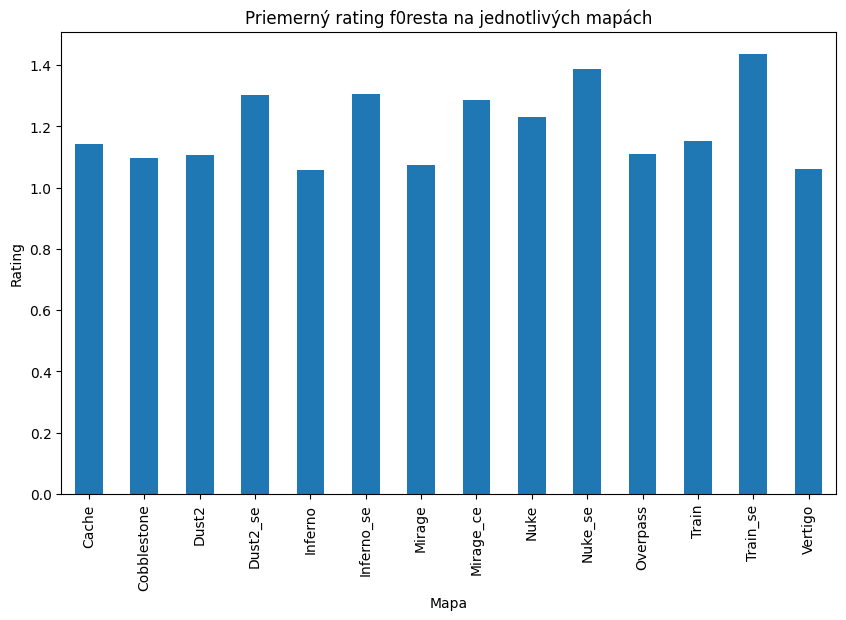

In [ ]:
print('Výkonnosť f0resta na jednotlivých mapách:')
print(f0rest_map_stats)

f0rest_map_stats['rating'].plot(kind='bar', figsize=(10, 6))
plt.title('Priemerný rating f0resta na jednotlivých mapách')
plt.xlabel('Mapa')
plt.ylabel('Rating')
plt.show()

Výpočet a zobrazenie hráčov s nízkym hs%

In [ ]:
# Filtrovanie hráčov s velkým počtom odohraných zápasov
min_matches = 120
filtered_players = player_stats[player_stats['matches_played'] >= min_matches]

# Filtrovanie hráčov s nízkym hs%
min_hs = 38
max_hs = 43
low_hs_players = filtered_players[filtered_players['hs%'] < max_hs]
low_hs_players = low_hs_players[low_hs_players['hs%'] > min_hs]

In [ ]:
result = low_hs_players[['player_nick', 'matches_played', 'hs%']].drop_duplicates().sort_values(by='hs%')
print(result)

      player_nick  matches_played        hs%
6395          Sys             322  38.002429
4710       Noktse             644  38.031340
10795      lukjjE             285  38.043515
4435    MusambaN1             298  38.048736
5743        SPUNJ             160  38.095588
...           ...             ...        ...
10065        jemi             257  42.870104
5721        SOKER             635  42.907907
5930      SeveN89             187  42.914287
8787        dumau             272  42.989952
10336    karrigan            1816  42.996842

[240 rows x 3 columns]


Klasifikácia hráčov do rolí - "Entry Fragger", "Support" a "AWPer"

In [ ]:
players_stats = pd.read_csv('/content/drive/MyDrive/Diplomová práca - Extrakcia a vyhodnocovanie herných dát/Datasety/players_stats.csv')
players_stats = players_stats.drop(columns=['Unnamed: 0', 'player_link'])

In [ ]:
# Úprava dát
players_stats["hs_percentage"] = players_stats["hs_percentage"].replace("-", np.nan)
players_stats["kast"] = players_stats["kast"].replace("-", np.nan)

players_stats["hs_percentage"] = players_stats["hs_percentage"].str.rstrip("%").astype(float) / 100
players_stats["kast"] = players_stats["kast"].str.rstrip("%").astype(float) / 100

players_stats["save_team_round"] = players_stats["save_team_round"].replace("-", "0")
players_stats["save_team_round"] = players_stats["save_team_round"].astype(float)

In [ ]:
# Skupinovanie podľa player_nick a spriemerovanie fkdiff
player_avg_stats = match_players.groupby('player_id').agg({
    'fkdiff': 'mean'
}).reset_index()

In [ ]:
players_stats.head()

,assists_round,deaths_round,dmg_round,gnd_dmg_round,hs_percentage,impact,kast,kd_ratio,kills_round,maps_played,player_age,player_country,player_id,player_nick,rating_1,rounds_played,save_team_round,saved_by_round,total_deaths,total_kills
0,0.11,0.71,72.9,2.8,0.583,0.98,0.672,0.97,0.68,79,19,Kazakhstan,18549,laser,1.00,2093,0.10,0.09,1477,1433
1,0.12,0.70,76.7,4.1,0.530,1.12,0.691,1.01,0.71,189,23,Australia,16531,tensai,1.06,4857,0.11,0.11,3404,3455
2,0.17,0.66,88.8,3.8,0.198,1.33,0.748,1.23,0.81,5,-,Brazil,17334,Seris,1.28,131,0.14,0.11,86,106
3,0.06,0.69,54.5,3.0,0.311,0.44,0.687,0.79,0.54,3,31,Australia,14508,deefekt,0.76,83,0.06,0.07,57,45
4,0.14,0.74,60.7,2.8,0.324,0.76,0.659,0.76,0.56,5,-,Korea,11666,fAwn,0.82,132,0.14,0.13,98,74


In [ ]:
player_avg_stats.head()

,player_id,fkdiff
0,1,-0.352941
1,2,-0.666667
2,7,0.581644
3,11,-0.750000
4,13,1.000000


In [ ]:
# Spojenie datasetov na základe player_id
all_players_data = players_stats.merge(player_avg_stats, on="player_id")

In [ ]:
# klasifikácia hráčov do rolí
def classify_role(row):
    if row["fkdiff"] > 1.2 and row["hs_percentage"] > 0.47 and row["kills_round"] > 0.6:
        return "Entry Fragger"
    elif row["assists_round"] > 0.15 and row["kast"] > 0.65 and row["save_team_round"] > 0.12:
        return "Support"
    elif row["hs_percentage"] < 0.38 and row["kd_ratio"] > 1.1 and row["deaths_round"] < 0.65:
        return "AWPer"
    else:
        return "Other"

In [ ]:
# Aplikovanie klasifikácie
all_players_data["role"] = all_players_data.apply(classify_role, axis=1)

In [ ]:
print("Počet hráčov v jednotlivých rolách:")
print(all_players_data["role"].value_counts())

Počet hráčov v jednotlivých rolách:
role
Other            13930
Support            278
AWPer              212
Entry Fragger      170
Name: count, dtype: int64


In [ ]:
print("Ukážka hráčov v jednotlivých rolách:")
for role in ["Entry Fragger", "Support", "AWPer"]:
    players_in_role = all_players_data.loc[all_players_data["role"] == role, "player_nick"].head(10)
    print(f"\n{role}:")
    print(players_in_role.to_string(index=False))

Ukážka hráčov v jednotlivých rolách:

Entry Fragger:
eXPLOSION
Nostalg1c
  Poheart
      jco
       FF
    Hales
   Jaukku
  Vespira
   VORTEX
     drot

Support:
 Seris
  Sami
calOth
 Bayau
 sephi
 Wolfi
    Jt
massER
   kLv
  Imba

AWPer:
   W1pe
sonamed
   oSee
   CeRq
 MeMsoN
 zetter
 syrsoN
   kono
   KwNN
konstab


In [ ]:
print(all_players_data[["fkdiff", "hs_percentage", "kills_round","kd_ratio"]].describe())
print(all_players_data[["assists_round","deaths_round" ,"kast", "save_team_round"]].describe())

             fkdiff  hs_percentage   kills_round      kd_ratio
count  14590.000000    14577.00000  14590.000000  14590.000000
mean      -0.553738        0.45502      0.601362      0.822677
std        1.231168        0.11289      0.129620      0.231100
min       -8.000000        0.00000      0.000000      0.000000
25%       -1.084644        0.39000      0.530000      0.690000
50%       -0.443142        0.46000      0.620000      0.850000
75%        0.102339        0.52200      0.680000      0.970000
max        6.000000        1.00000      1.290000      5.200000
       assists_round  deaths_round          kast  save_team_round
count   14590.000000  14590.000000  12706.000000     14590.000000
mean        0.123676      0.748071      0.638640         0.082124
std         0.043410      0.088060      0.084522         0.048495
min         0.000000      0.000000      0.167000         0.000000
25%         0.100000      0.690000      0.604000         0.060000
50%         0.130000      0.730000   

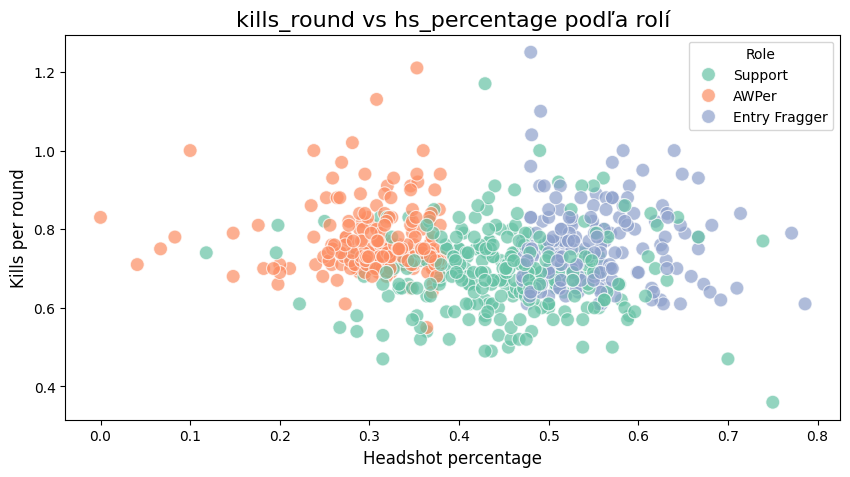

In [ ]:
filtered_data = all_players_data[all_players_data["role"] != "Other"]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_data, x="hs_percentage", y="kills_round", hue="role", palette="Set2", s=100, alpha=0.7)
plt.title("kills_round vs hs_percentage podľa rolí", fontsize=16)
plt.xlabel("Headshot percentage", fontsize=12)
plt.ylabel("Kills per round", fontsize=12)
plt.legend(title="Role", loc='upper right')
plt.show()

<ipython-input-56-b1d1f0630c74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x="role", y="rating_1", palette="Set2")


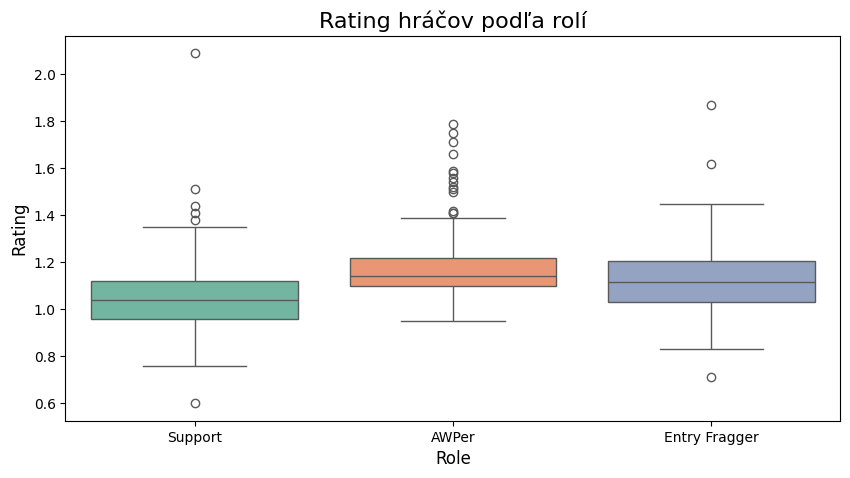

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_data, x="role", y="rating_1", palette="Set2")
plt.title("Rating hráčov podľa rolí", fontsize=16)
plt.xlabel("Role", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.show()